##  Setup & Clone Repo

In [1]:
!git clone https://github.com/Sruthi-Reddy-B/Object-detection-with-pose-visualization.git
%cd Object-detection-with-pose-visualization
!pip install -r requirements.txt

import os
os.makedirs('results/detections', exist_ok=True)
os.makedirs('results/visualization', exist_ok=True)


Cloning into 'Object-detection-with-pose-visualization'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 128 (delta 52), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (128/128), 359.65 KiB | 4.73 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/Object-detection-with-pose-visualization
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.7 MB/s eta 0:00:00


## Download Demo Image & Create Dummy Pose

In [2]:
os.makedirs('./data/images', exist_ok=True)
os.makedirs('./data/poses', exist_ok=True)
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/bus.jpg -O data/images/object_1.jpg

import pandas as pd
pose_data = pd.DataFrame({
    'image': ['object_1.jpg'],
    'x': [120.5],
    'y': [85.3],
    'z': [0.55],
    'roll': [10.0],
    'pitch': [5.0],
    'yaw': [45.0]
})
pose_data.to_csv("./data/poses/pose_labels.csv", index=False)

print("Dataset and dummy pose labels ready.")


Dataset and dummy pose labels ready.


## Train YOLO Model (Optional Demo)

In [ ]:
# This uses src/train.py
#!python src/train.py


## Run Inference & Visualize 6D Pose


In [3]:
# Download YOLOv8 pre-trained weights if not present
import os
import cv2
import numpy as np
from ultralytics import YOLO
from scipy.spatial.transform import Rotation as R

# --- Load Pretrained YOLO ---
MODEL_PATH = "./yolov8n.pt"

# Download YOLOv8n if missing
if not os.path.exists(MODEL_PATH):
    !wget -q https://github.com/ultralytics/assets/releases/download/v8.3.0/yolov8n.pt -O ./yolov8n.pt

model = YOLO(MODEL_PATH)



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# --- Run Inference Script ---
!python ./src/inference.py


Results saved to /content/Object-detection-with-pose-visualization/results/detections/pred
Estimated 6D Pose Matrix:
 [[    0.70442    -0.68566     0.18348       120.5]
 [    0.70442     0.70707   -0.062096        85.3]
 [  -0.087156     0.17299     0.98106        0.55]]
Pose visualization with bounding box saved at: ./results/visualization/pose_axes_box.jpg


## Display Results in Notebook

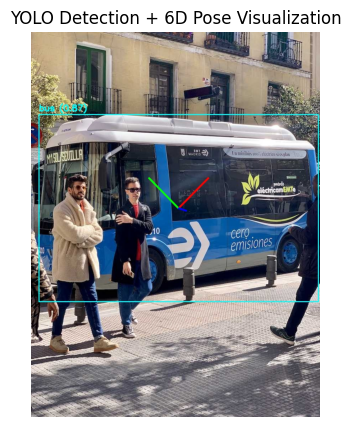

In [5]:
import cv2
import matplotlib.pyplot as plt

img_pose = cv2.imread('./results/visualization/pose_axes_box.jpg')
plt.figure(figsize=(7, 5))
plt.imshow(cv2.cvtColor(img_pose, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLO Detection + 6D Pose Visualization")
plt.show()

